# ABC Model

# Macs2 Call Peaks and Make Candidate Regions


## Describing the Activity by Contact Model of Enhancer-Gene Specificity in Common Workflow Language
  
[broadinstitute/ABC-Enhancer-Gene-Prediction: Cell type specific enhancer-gene predictions using ABC model (Fulco, Nasser et al, Nature Genetics 2019)](https://github.com/broadinstitute/ABC-Enhancer-Gene-Prediction) 


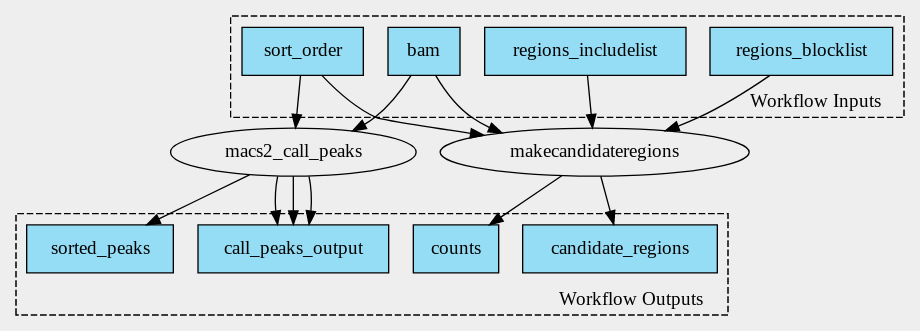

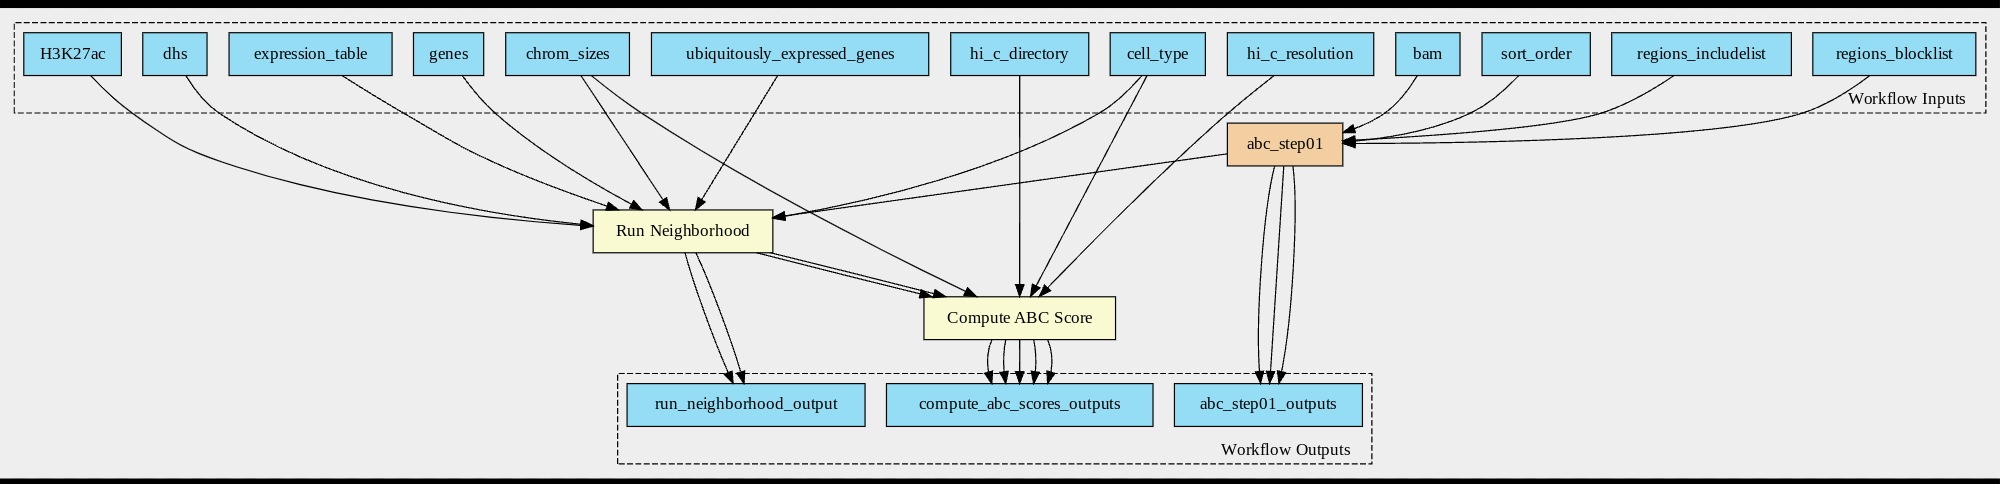

## Working with CWL in JupyterLab Environment

In [1]:
%%sh --no-raise-error --err ERR --out OUT
pip install cwltool udocker sbpack

In [2]:
%%sh
cp -r .sevenbridges ~/

In [20]:
%%sh
sbpull --unpack nhlbi dave/abc-development-scratch-project/abc-enchancer-gene-prediction abc_wf.cwl

1: abc_wf.cwl
2: abc_wf.cwl.steps/run_neighborhoods_1.cwl
3: abc_wf.cwl.steps/compute_abc_score.cwl
4: abc_wf.cwl.steps/abc_step01.cwl
5: abc_wf.cwl.steps/abc_step01.cwl.steps/macs2_call_peaks.cwl
6: abc_wf.cwl.steps/abc_step01.cwl.steps/makecandidateregions.cwl


Remember this should be in the the workflow requirements
```
requirements:
- class: LoadListingRequirement
- class: SubworkflowFeatureRequirement
- class: InlineJavascriptRequirement
- class: StepInputExpressionRequirement
- class: MultipleInputFeatureRequirement 
```
MultipleInputFeatureRequirement - is not in the SB code

## CWLtool command line

In [6]:
%%writefile run_abc_wf.sh
cwltool --udocker --verbose --leave-tmpdir --copy-outputs --cachedir ~/temp-outs abc_wf.cwl \
    --bam /sbgenomics/project-files/organized_files/ABC-Enhancer-Gene-Prediction/example_chr22/input_data/Chromatin/wgEncodeUwDnaseK562AlnRep1.chr22.bam \
    --sort_order /sbgenomics/project-files/ABC-Enhancer-Gene-Prediction/example_chr22/reference/chr22 \
    --regions_includelist /sbgenomics/project-files/organized_files/ABC-Enhancer-Gene-Prediction/example_chr22/reference/RefSeqCurated.170308.bed.CollapsedGeneBounds.TSS500bp.chr22.bed \
    --regions_blocklist /sbgenomics/project-files/organized_files/ABC-Enhancer-Gene-Prediction/reference/wgEncodeHg19ConsensusSignalArtifactRegions.bed \
    --ubiquitously_expressed_genes /sbgenomics/project-files/ABC-Enhancer-Gene-Prediction/reference/UbiquitouslyExpressedGenesHG19.txt \
    --H3K27ac /sbgenomics/project-files/organized_files/ABC-Enhancer-Gene-Prediction/example_chr22/input_data/Chromatin/ENCFF384ZZM.chr22.bam \
    --genes /sbgenomics/project-files/organized_files/ABC-Enhancer-Gene-Prediction/example_chr22/reference/RefSeqCurated.170308.bed.CollapsedGeneBounds.chr22.bed  \
    --dhs /sbgenomics/project-files/organized_files/ABC-Enhancer-Gene-Prediction/example_chr22/input_data/Chromatin/wgEncodeUwDnaseK562AlnRep1.chr22.bam \
    --hi_c_resolution 5000 \
    --chrom_sizes /sbgenomics/project-files/organized_files/ABC-Enhancer-Gene-Prediction/example_chr22/reference/chr22 \
    --hi_c_directory /sbgenomics/project-files/organized_files/ABC-Enhancer-Gene-Prediction/example_chr22/input_data/HiC/raw \
    --cell_type K562 \
    --expression_table /sbgenomics/project-files/organized_files/ABC-Enhancer-Gene-Prediction/example_chr22/input_data/Expression/K562.ENCFF934YBO.TPM.txt


Overwriting run_abc_wf.sh


In [ ]:
%%sh --out temp 
bash run_abc_wf.sh > standard.out

## create workflow graph images

In [16]:
%%sh
sudo apt-get update
sudo apt-get install -y graphviz

Get:1 http://archive.ubuntu.com/ubuntu focal InRelease [265 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal/universe amd64 Packages [11.3 MB]
Get:6 http://archive.ubuntu.com/ubuntu focal/restricted amd64 Packages [33.4 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [177 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal/main amd64 Packages [1,275 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [31.2 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,252 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2,483 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,351 kB]
Get:13 http://archive.ubuntu.com/ubuntu focal-

debconf: delaying package configuration, since apt-utils is not installed


In [17]:
%%sh --out temp_out --no-raise-error --err ERR
cwltool --print-dot abc_wf.cwl | dot -Tsvg > abc_step01_workflow_graph.svg



In [ ]:
%%sh --out temp_out --no-raise-error --err ERR
sbpack nhlbi dave/ abc_step01_wf.cwl